In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sheet1_id = "1xbwnLB64VvRLRssRH_4LgLpNbYPL67Iz"
sheet2_id = "1wPJYYbBiYfmwCMwAaMZhPmJk-FAyu1QzUHgEpOluYyk"

url1 = f"https://docs.google.com/spreadsheets/d/{sheet1_id}/gviz/tq?tqx=out:csv"
url2 = f"https://docs.google.com/spreadsheets/d/{sheet2_id}/gviz/tq?tqx=out:csv"


df_cars = pd.read_csv(url1)
df2_rates = pd.read_csv(url2)

In [2]:
df_cars.head(5)

,Year,"Light vehicle retail sales((in 1,000 units))"
0,2024,"15,858.40"
1,2023,"15,502.50"
2,2022,"13,754.30"
3,2021,"14,946.90"
4,2020,"14,471.80"


In [3]:
df2_rates.head(6)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
5,1954,12,1,NaN,NaN,NaN,1.28,NaN,5.0,NaN


In [4]:
df_cars.rename(columns={"Year": "Year", "Light vehicle retail sales((in 1,000 units))": "Car Sales"}, inplace=True)
df2_rates.rename(columns={"Year": "Year", "Effective Federal Funds Rate": "Interest Rate"}, inplace=True)

# Keep only the necessary columns
df_cars = df_cars[['Year', 'Car Sales']]
df2_rates = df2_rates[['Year', 'Month', 'Interest Rate', 'Inflation Rate']]


# Fill missing interest and inflation rate values using linear interpolation
df2_yearly = df2_rates.groupby('Year', as_index=False).agg({'Interest Rate': 'median', 'Inflation Rate': 'mean'})

# Aggregate only Interest Rate and Inflation Rate to yearly averages, excluding "Month"
df2_yearly = df2_rates.groupby('Year', as_index=False)[['Interest Rate', 'Inflation Rate']].mean()

# Merge datasets based on Year
df_merged = pd.merge(df_cars, df2_yearly, on='Year', how='inner')

# Display fixed merged dataset
print("\nFixed Merged Dataset:")
print(df_merged.head())


Fixed Merged Dataset:
   Year  Car Sales  Interest Rate  Inflation Rate
0  2017  17,150.10       0.655000        2.250000
1  2016  17,477.30       0.395000        2.191667
2  2015     17,408       0.132500        1.825000
3  2014  16,452.20       0.089167        1.750000
4  2013  15,530.10       0.107500        1.758333


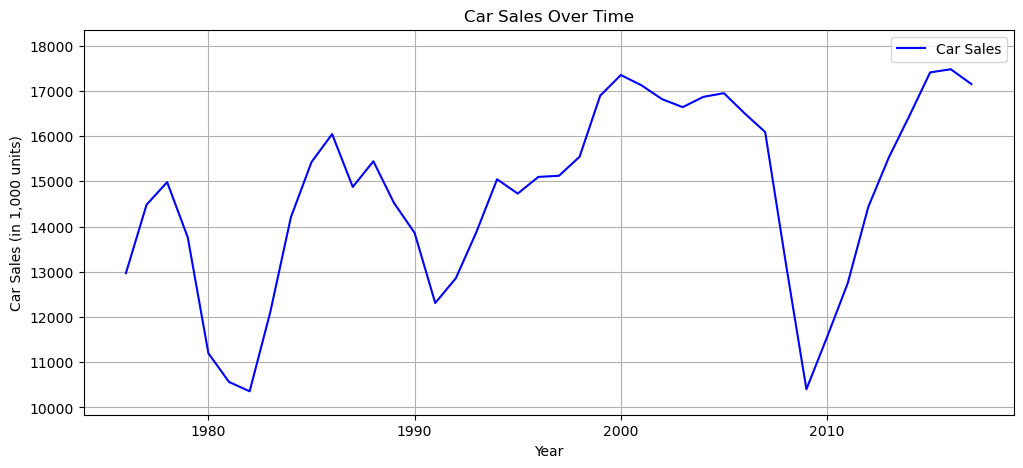

In [5]:
df_merged['Car Sales'] = df_merged['Car Sales'].replace(',', '', regex=True).astype(float)

plt.figure(figsize=(12, 5))
plt.plot(df_merged['Year'], df_merged['Car Sales'], label="Car Sales", color='b')

plt.xlabel('Year')
plt.ylabel('Car Sales (in 1,000 units)')
plt.title('Car Sales Over Time')

plt.ylim(df_merged['Car Sales'].min() * 0.95, df_merged['Car Sales'].max() * 1.05)

plt.legend()
plt.grid(True)
plt.show()



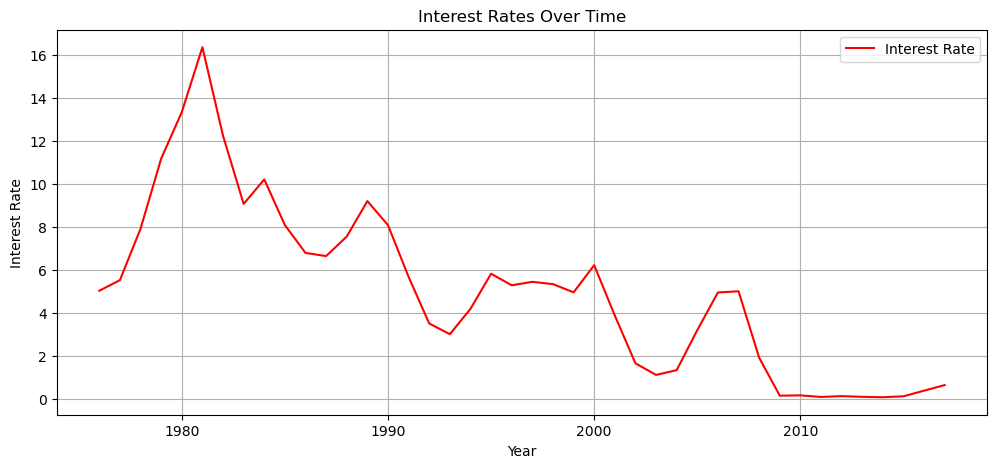

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Year'], df_merged['Interest Rate'], label="Interest Rate", color='r')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('Interest Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()

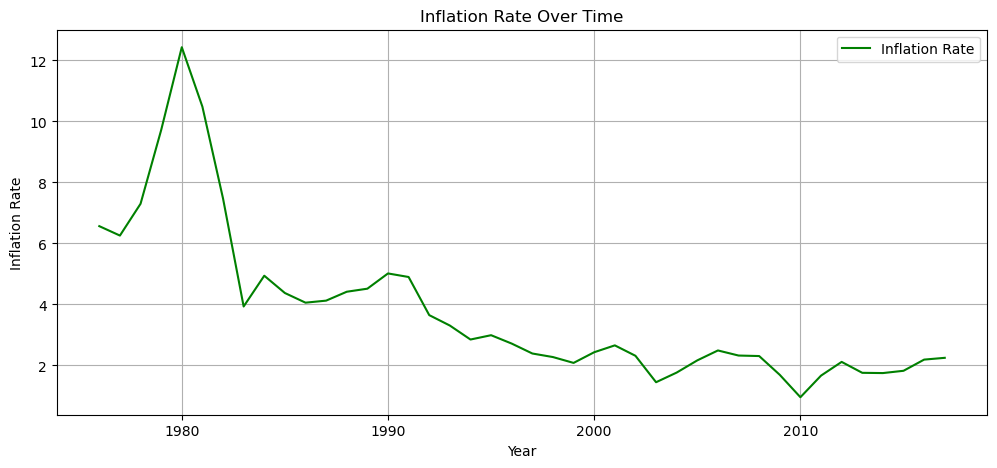

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Year'], df_merged['Inflation Rate'], label="Inflation Rate", color='g')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

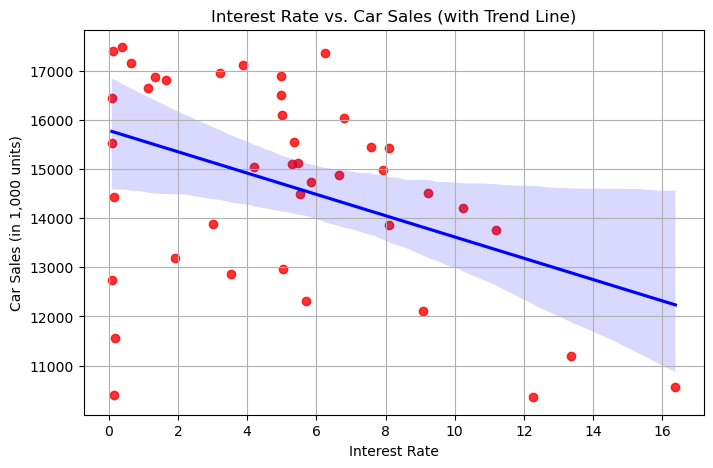

In [8]:
#Scatter Plot with Trend Line (Interest Rate vs. Car Sales)
plt.figure(figsize=(8, 5))
sns.regplot(x=df_merged['Interest Rate'], y=df_merged['Car Sales'], scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.xlabel('Interest Rate')
plt.ylabel('Car Sales (in 1,000 units)')
plt.title('Interest Rate vs. Car Sales (with Trend Line)')
plt.grid(True)
plt.show()

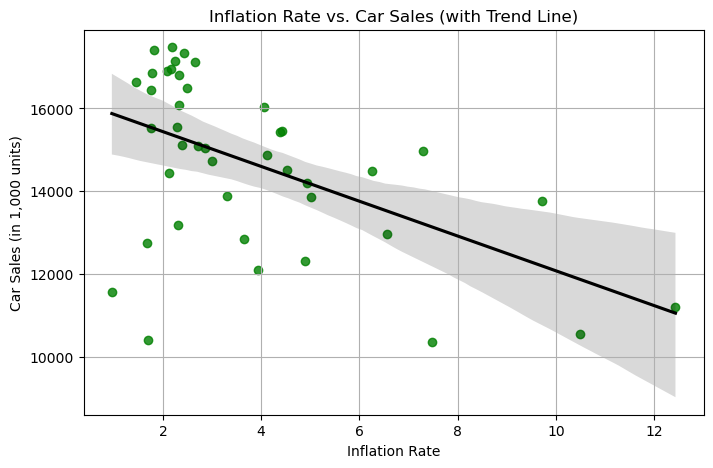

In [9]:
#Scatter Plot with Trend Line (Inflation Rate vs. Car Sales)
plt.figure(figsize=(8, 5))
sns.regplot(x=df_merged['Inflation Rate'], y=df_merged['Car Sales'], scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.xlabel('Inflation Rate')
plt.ylabel('Car Sales (in 1,000 units)')
plt.title('Inflation Rate vs. Car Sales (with Trend Line)')
plt.grid(True)
plt.show()

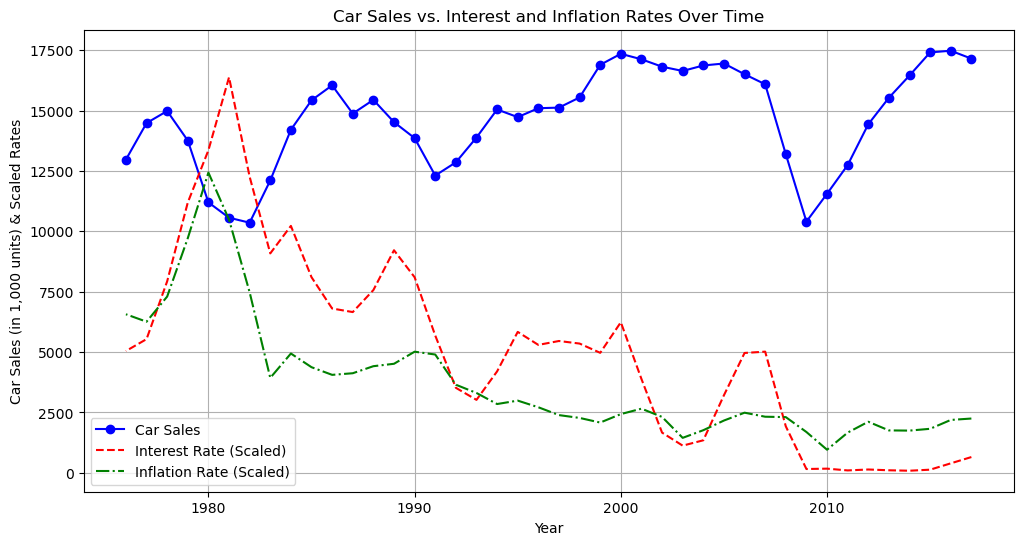

In [10]:
#Multiple Line Plot Over Time (Car Sales, Interest Rates, and Inflation)
plt.figure(figsize=(12, 6))
plt.plot(df_merged['Year'], df_merged['Car Sales'], label="Car Sales", color='b', marker='o')
plt.plot(df_merged['Year'], df_merged['Interest Rate'] * 1000, label="Interest Rate (Scaled)", color='r', linestyle='--')  # Scaling interest rate for better visibility
plt.plot(df_merged['Year'], df_merged['Inflation Rate'] * 1000, label="Inflation Rate (Scaled)", color='g', linestyle='-.')  # Scaling inflation rate
plt.xlabel('Year')
plt.ylabel('Car Sales (in 1,000 units) & Scaled Rates')
plt.title('Car Sales vs. Interest and Inflation Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()

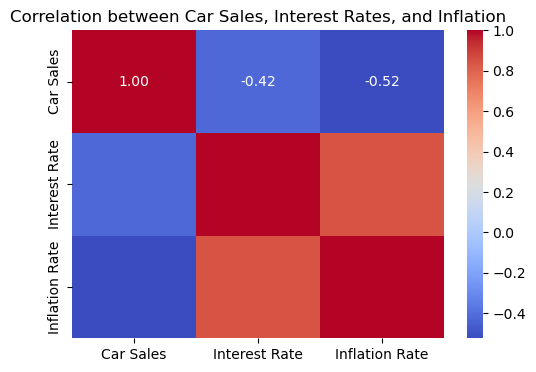

In [11]:
#Heatmap (Correlation between Car Sales, Interest Rates, and Inflation Rates)
plt.figure(figsize=(6, 4))
correlation_matrix = df_merged[['Car Sales', 'Interest Rate', 'Inflation Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Car Sales, Interest Rates, and Inflation")
plt.show()

In [12]:
if correlation_matrix.loc['Car Sales', 'Interest Rate'] < 0:
    print("There is a negative correlation: Higher interest rates are associated with lower car sales.")
else:
    print("There is a positive correlation: Higher interest rates are associated with higher car sales.")

if correlation_matrix.loc['Car Sales', 'Inflation Rate'] < 0:
    print("There is a negative correlation: Higher inflation rates are associated with lower car sales.")
else:
    print("There is a positive correlation: Higher inflation rates are associated with higher car sales.")


There is a negative correlation: Higher interest rates are associated with lower car sales.
There is a negative correlation: Higher inflation rates are associated with lower car sales.


C:\Users\saifu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


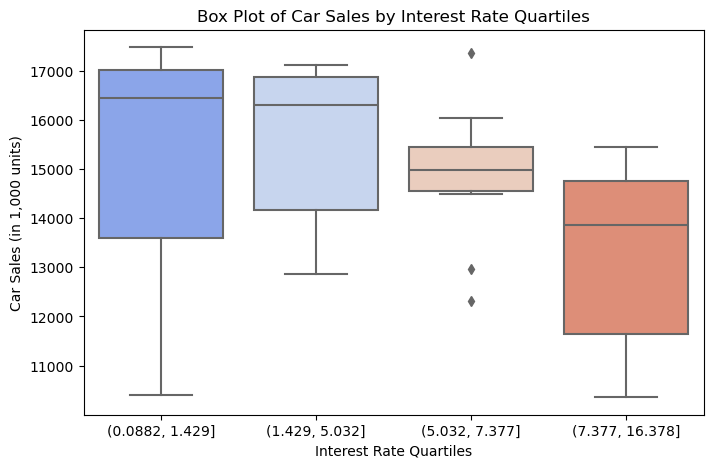

In [14]:
# Box Plot of Car Sales by Interest Rate Quartiles
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(df_merged['Interest Rate'], q=4), y=df_merged['Car Sales'], palette='coolwarm')
plt.xlabel('Interest Rate Quartiles')
plt.ylabel('Car Sales (in 1,000 units)')
plt.title('Box Plot of Car Sales by Interest Rate Quartiles')
plt.show()


C:\Users\saifu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


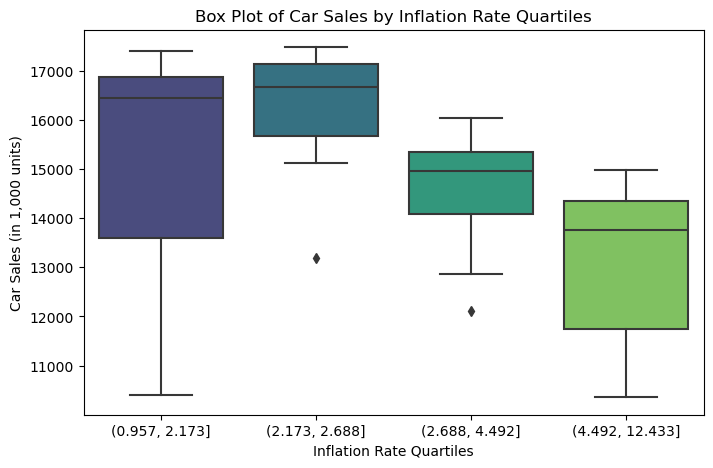

In [17]:
# Box Plot of Car Sales by Inflation Rate Quartiles
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(df_merged['Inflation Rate'], q=4), y=df_merged['Car Sales'], palette='viridis')
plt.xlabel('Inflation Rate Quartiles')
plt.ylabel('Car Sales (in 1,000 units)')
plt.title('Box Plot of Car Sales by Inflation Rate Quartiles')
plt.show()